# Unsupervised and Semi-Surpervised ML 
## Nate Damen - created 09/27/2020 - updated xxxxxxx

Cluster the Olivetti Dataset

In [1]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import silhouette_score

In [11]:
import numpy as np

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
from sklearn.pipeline import Pipeline

In [36]:
from sklearn.mixture import GaussianMixture

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sb

In [26]:
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

In [3]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

Stratified Shuffle Split the data, to preserve the percentage of the classes in the data

In [5]:
test_splitter = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=32)
val_splitter = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=33)

In [6]:
val_train_idx, test_idx = next(test_splitter.split(olivetti.data, olivetti.target))
x_val_train = olivetti.data[val_train_idx]
y_val_train = olivetti.target[val_train_idx]
x_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

In [7]:
train_idx, val_idx = next(val_splitter.split(x_val_train, y_val_train))
x_train = x_val_train[train_idx]
y_train = y_val_train[train_idx]
x_val = x_val_train[val_idx]
y_val = y_val_train[val_idx]

Let's Cluster kMeans

In [8]:
k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print('k={}'.format(k))
    kmeans = KMeans(n_clusters=k, random_state=32).fit(x_train)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


Let's check our silhouette score and inertia

In [12]:
silhouette_scores = [silhouette_score(x_train, model.labels_) for model in kmeans_per_k]
best_idx = np.argmax(silhouette_scores)
best_k = k_range[best_idx]
best_score = silhouette_scores[best_idx]
print('The best score is {} from k equal to {}.'.format(best_score, best_k))

The best score is 0.1993301659822464 from k equal to 110.


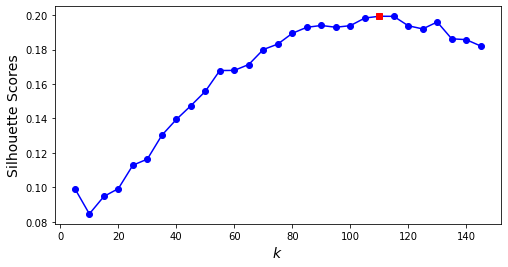

In [17]:
plt.figure(figsize=(8,4))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel('$k$', fontsize=14)
plt.ylabel("Silhouette Scores", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [19]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_idx]
print('The best inertia is {}'.format(best_inertia))

The best inertia is 3496.9105117030904


<function matplotlib.pyplot.show(*args, **kw)>

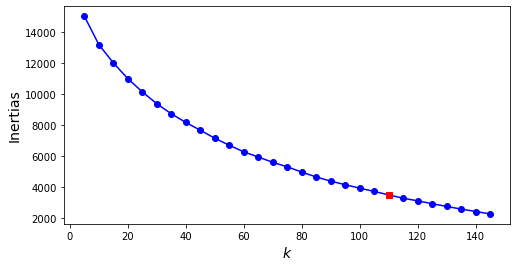

In [20]:
plt.figure(figsize=(8,4))
plt.plot(k_range, inertias, "bo-")
plt.plot(best_k, best_inertia, "rs")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertias", fontsize=14)
plt.show

Selecting the best model

In [22]:
best_model = kmeans_per_k[best_idx]

Lets see who is in what cluster!

Cluster 0


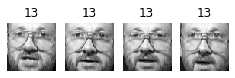

Cluster 1


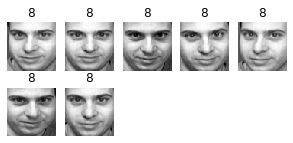

Cluster 2


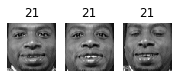

Cluster 3


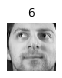

Cluster 4


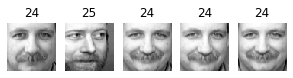

Cluster 5


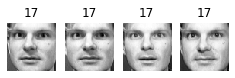

Cluster 6


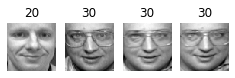

Cluster 7


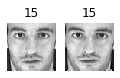

Cluster 8


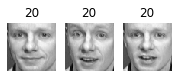

Cluster 9


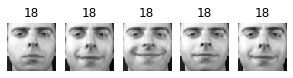

Cluster 10


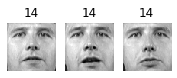

Cluster 11


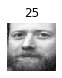

Cluster 12


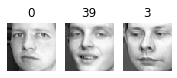

Cluster 13


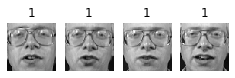

Cluster 14


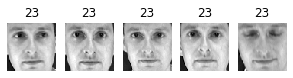

Cluster 15


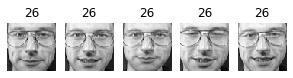

Cluster 16


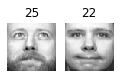

Cluster 17


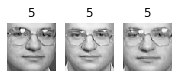

Cluster 18


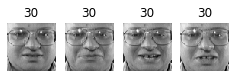

Cluster 19


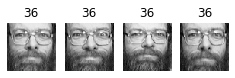

Cluster 20


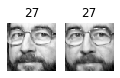

Cluster 21


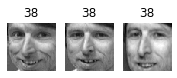

Cluster 22


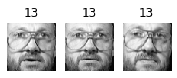

Cluster 23


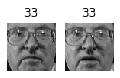

Cluster 24


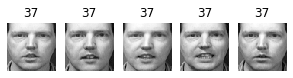

Cluster 25


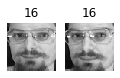

Cluster 26


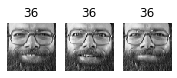

Cluster 27


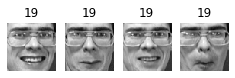

Cluster 28


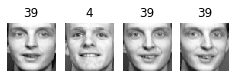

Cluster 29


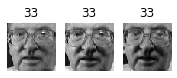

Cluster 30


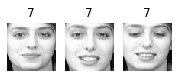

Cluster 31


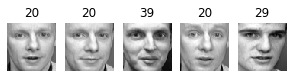

Cluster 32


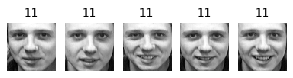

Cluster 33


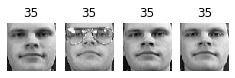

Cluster 34


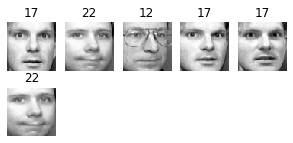

Cluster 35


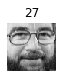

Cluster 36


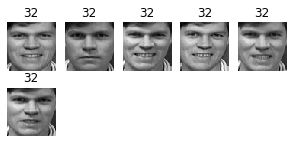

Cluster 37


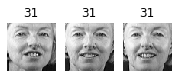

Cluster 38


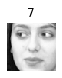

Cluster 39


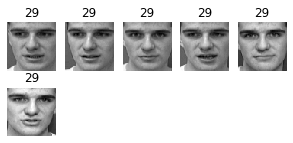

Cluster 40


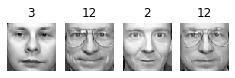

Cluster 41


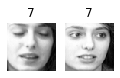

Cluster 42


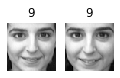

Cluster 43


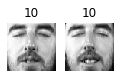

Cluster 44


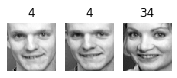

Cluster 45


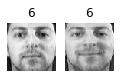

Cluster 46


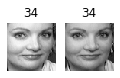

Cluster 47


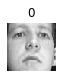

Cluster 48


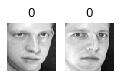

Cluster 49


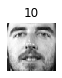

Cluster 50


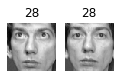

Cluster 51


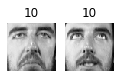

Cluster 52


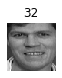

Cluster 53


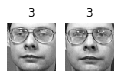

Cluster 54


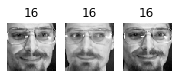

Cluster 55


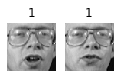

Cluster 56


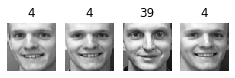

Cluster 57


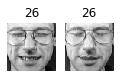

Cluster 58


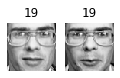

Cluster 59


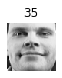

Cluster 60


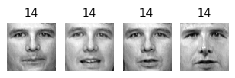

Cluster 61


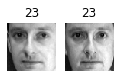

Cluster 62


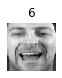

Cluster 63


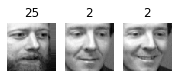

Cluster 64


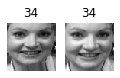

Cluster 65


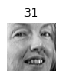

Cluster 66


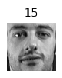

Cluster 67


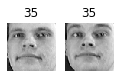

Cluster 68


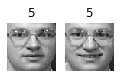

Cluster 69


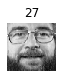

Cluster 70


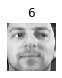

Cluster 71


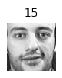

Cluster 72


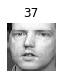

Cluster 73


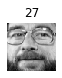

Cluster 74


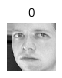

Cluster 75


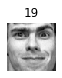

Cluster 76


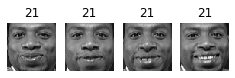

Cluster 77


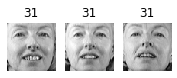

Cluster 78


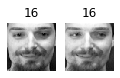

Cluster 79


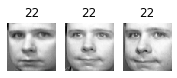

Cluster 80


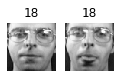

Cluster 81


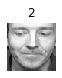

Cluster 82


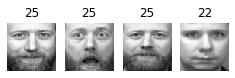

Cluster 83


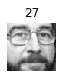

Cluster 84


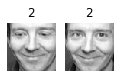

Cluster 85


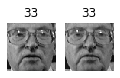

Cluster 86


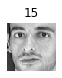

Cluster 87


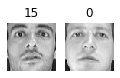

Cluster 88


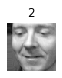

Cluster 89


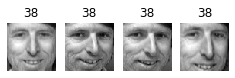

Cluster 90


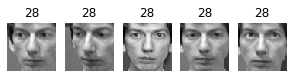

Cluster 91


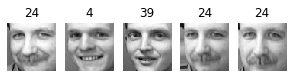

Cluster 92


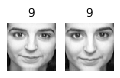

Cluster 93


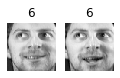

Cluster 94


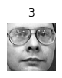

Cluster 95


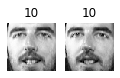

Cluster 96


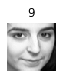

Cluster 97


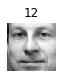

Cluster 98


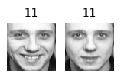

Cluster 99


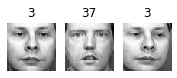

Cluster 100


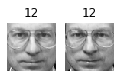

Cluster 101


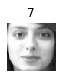

Cluster 102


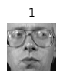

Cluster 103


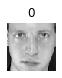

Cluster 104


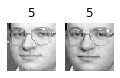

Cluster 105


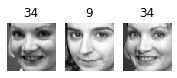

Cluster 106


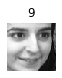

Cluster 107


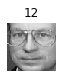

Cluster 108


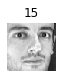

Cluster 109


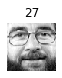

In [24]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = x_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

## Lets determine who is what face using clusting as preprocessing

In [29]:
x_train_reduced = best_model.transform(x_train)
x_test_reduced = best_model.transform(x_test)
x_val_reduced = best_model.transform(x_val)

In [33]:
rnd_clf = RandomForestClassifier(n_estimators=200, random_state=32)
rnd_clf.fit(x_train_reduced, y_train)

rnd_clf.score(x_val_reduced, y_val)

0.8375

In [32]:
for n_cluster in k_range:
    pipe = Pipeline([
        ('kmeans', KMeans(n_clusters=n_cluster, random_state=n_cluster)),
        ('forest_clf', RandomForestClassifier(n_estimators=200, random_state=32))
    ]) 
    pipe.fit(x_train, y_train)
    print(n_cluster, pipe.score(x_val, y_val)) 

5 0.5625
10 0.7
15 0.7
20 0.75
25 0.8
30 0.75
35 0.825
40 0.775
45 0.8375
50 0.8125
55 0.8125
60 0.8125
65 0.8625
70 0.8625
75 0.825
80 0.8625
85 0.875
90 0.85
95 0.875
100 0.85
105 0.85
110 0.875
115 0.85
120 0.875
125 0.875
130 0.8375
135 0.8375
140 0.8375
145 0.875


## Lets train a gaussian mixture on the Faces Dataset
Start by preforming a pca on the data to speed things up

In [34]:
pca = PCA(0.99)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
x_val_pca = pca.transform(x_val)

In [35]:
pca.n_components_

200

In [37]:
gm = GaussianMixture(n_components=40, random_state=32)
y_pred = gm.fit_predict(x_train_pca)

Now to generate new faces!

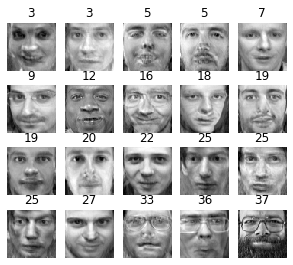

In [40]:
n_gen_faces= 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)
plot_faces(gen_faces, y_gen_faces)

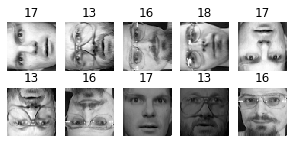

In [43]:
rotated = np.transpose(x_train[:4].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64 * 64)
y_rotated = y_train[:4]

flipped = x_train[:3].reshape(-1, 64, 64)[:,::-1]
flipped = flipped.reshape(-1, 64 * 64)
y_flipped = y_train[:3]

darkened = x_train[:3].copy()
darkened[:, 1:-1] *= 0.3
darkened = darkened.reshape(-1, 64 * 64)
y_darkened = y_train[:3]

x_mod_faces = np.r_[rotated, flipped, darkened]
y_mod_faces = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(x_mod_faces, y_mod_faces)

Can the model see if these faces are anomolies. Compared to the reg training set?

In [44]:
x_mod_faces_pca = pca.transform(x_mod_faces)
gm.score_samples(x_mod_faces_pca)

array([-37293254.02077514, -29791408.31220654, -52981947.15178391,
       -37980295.80760727, -30834706.00456597, -50208961.34393095,
       -48295947.43148369, -74434209.26441373, -92047544.36137177,
       -78834793.0955376 ])

In [45]:
gm.score_samples(x_train_pca[:10])

array([1095.16488996, 1146.21673675, 1101.22088038, 1144.66078659,
       1144.9295685 , 1144.929568  , 1144.92956945, 1095.16490157,
       1161.30160103, 1168.10459674])

## Using Dimension Reducing Techniques for Anomaly Detection
Find out the reconstruction error from the PCA on both the reg set and the generated faces

In [46]:
def reconstruction_error(pca, x):
    x_pca = pca.transform(x)
    x_reconstruct = pca.inverse_transform(x_pca)
    mse = np.square(x_reconstruct - x).mean(axis = -1)
    return mse

In [47]:
reconstruction_error(pca, x_train).mean()

0.00019006213

In [48]:
reconstruction_error(pca, x_mod_faces).mean()

0.006147273

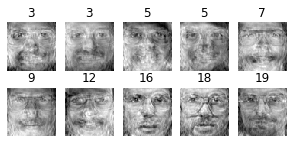

In [49]:
x_mod_reconstructed = pca.inverse_transform(x_mod_faces_pca)
plot_faces(x_mod_reconstructed, y_gen_faces)

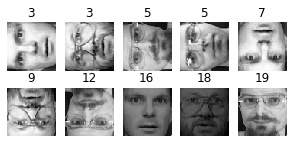

In [50]:
plot_faces(x_mod_faces, y_gen_faces)